# Prep set

In [1]:
import pandas as pd
import ast
import json
import subprocess as sb
import numpy as np

In [2]:
data="data.json"
with open(data, 'r') as r:
    i=0
    lines=[]
    for x in r:
        lines.append(pd.DataFrame([json.loads(x)]))
        i+=1
        if i%10000==0:
            print(i)
    res=pd.concat(lines)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [3]:
res['business_review_count']=res['business_id'].map(lambda x: x['review_count'])

In [4]:
res['attributes_count']=res['business_id'].map(lambda x: len(x['attributes']))

In [5]:
row=(dict(res[['attributes_count']].reset_index().iterrows())[0])
for x in row:
    print(x)

0
24


In [11]:
row[1]

24

In [12]:
res.index=pd.RangeIndex(len(res))

In [13]:
res.count()

business_id              206705
cool                     206705
date                     206705
funny                    206705
incorrect_words          206705
                          ...  
useful                   206705
user_id                  206705
words                    206705
business_review_count    206705
attributes_count         206705
Length: 13, dtype: int64

In [14]:
pd.set_option('display.max_rows', 10)
res.groupby('cool').count()

,business_id,date,funny,incorrect_words,review_id,stars,text,useful,user_id,words,business_review_count,attributes_count
cool,,,,,,,,,,,,
0,137645,137645,137645,137645,137645,137645,137645,137645,137645,137645,137645,137645
1,40566,40566,40566,40566,40566,40566,40566,40566,40566,40566,40566,40566
2,13957,13957,13957,13957,13957,13957,13957,13957,13957,13957,13957,13957
3,6022,6022,6022,6022,6022,6022,6022,6022,6022,6022,6022,6022
4,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
...,...,...,...,...,...,...,...,...,...,...,...,...
167,1,1,1,1,1,1,1,1,1,1,1,1
170,1,1,1,1,1,1,1,1,1,1,1,1
172,1,1,1,1,1,1,1,1,1,1,1,1


In [15]:
res.groupby('useful').count()

,business_id,cool,date,funny,incorrect_words,review_id,stars,text,user_id,words,business_review_count,attributes_count
useful,,,,,,,,,,,,
0,78021,78021,78021,78021,78021,78021,78021,78021,78021,78021,78021,78021
1,51087,51087,51087,51087,51087,51087,51087,51087,51087,51087,51087,51087
2,28837,28837,28837,28837,28837,28837,28837,28837,28837,28837,28837,28837
3,16355,16355,16355,16355,16355,16355,16355,16355,16355,16355,16355,16355
4,9858,9858,9858,9858,9858,9858,9858,9858,9858,9858,9858,9858
...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,1,1,1,1,1,1,1,1,1,1,1
170,1,1,1,1,1,1,1,1,1,1,1,1
173,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:
res.groupby('funny').count()

,business_id,cool,date,incorrect_words,review_id,stars,text,useful,user_id,words,business_review_count,attributes_count
funny,,,,,,,,,,,,
0,146281,146281,146281,146281,146281,146281,146281,146281,146281,146281,146281,146281
1,33556,33556,33556,33556,33556,33556,33556,33556,33556,33556,33556,33556
2,11938,11938,11938,11938,11938,11938,11938,11938,11938,11938,11938,11938
3,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537
4,2982,2982,2982,2982,2982,2982,2982,2982,2982,2982,2982,2982
...,...,...,...,...,...,...,...,...,...,...,...,...
260,1,1,1,1,1,1,1,1,1,1,1,1
414,1,1,1,1,1,1,1,1,1,1,1,1
487,1,1,1,1,1,1,1,1,1,1,1,1


In [17]:
res['text'].loc[2]

'interesting cave like setting.  busy, but way overpriced for what it is.  nothing special or memorable about the steaks or sides. average quality food. average service, nothing special to stand out from any other restaurant. hyped name.  professional host greeting.'

In [18]:
res[res['text'].isnull()]

,business_id,cool,date,funny,incorrect_words,review_id,stars,text,useful,user_id,words,business_review_count,attributes_count


In [19]:
# number of words
#pd.set_option('display.max_rows', 800)
#res.groupby(lambda a: len(res['text'].loc[a].split(' '))).count()

In [20]:
# review_counts
#res.groupby('business_review_count').count()
res[res['business_review_count']>50].count()

business_id              139075
cool                     139075
date                     139075
funny                    139075
incorrect_words          139075
                          ...  
useful                   139075
user_id                  139075
words                    139075
business_review_count    139075
attributes_count         139075
Length: 13, dtype: int64

In [21]:
res.groupby('attributes_count').count()
res[res['attributes_count']>10].count()

business_id              132341
cool                     132341
date                     132341
funny                    132341
incorrect_words          132341
                          ...  
useful                   132341
user_id                  132341
words                    132341
business_review_count    132341
attributes_count         132341
Length: 13, dtype: int64

In [22]:
pd.set_option('display.max_rows', 0)

In [23]:
res['business_id'].loc[2]['stars']

4.0

In [24]:
n=res[res['business_review_count']>50].count()[0]
print(n)
#print(type(n))
#rs=res[res['business_review_count']>50].sample(n=n).copy()
#pos=rs[rs[like_type]>2].sample(n=40000).copy()

139075


In [25]:
#res[lambda r: True].sample(n=1) #??
#res[print(res['business'])]#
#res[print(type(res['business']))]
#res.apply()
#res[res['business'].get('business_id')=='aAbL_y05zPWaIrT1QtDWxw'].sample(n=1)

In [26]:
def get_reviews(like_type):
    n=res[res['business_review_count']>50].count()[0]
    #print(n)
    #print(type(n))
    tmp=res[res['business_review_count']>50].sample(n=n).copy()
    n=tmp[tmp['attributes_count']>10].count()[0]
    rs=tmp[tmp['attributes_count']>10].sample(n=n).copy()

    pos=rs[rs[like_type]>2].sample(n=10000).copy()
    pos['classification']=like_type
    neg=rs[rs[like_type]==0].sample(n=10000).copy()
    neg['classification']='not-'+like_type
    all=pd.concat([pos, neg])
    all=all[['text', like_type, 'classification', 'stars', 'business_id', 'words', 'incorrect_words']].reset_index(drop=True)
    return all

# Classification

In [27]:
import nltk
toker=nltk.tokenize.TweetTokenizer()

In [28]:
like_type='useful'
#like_type='funny'
#like_type='cool'

In [29]:
reviews=get_reviews(like_type)

In [30]:
texts_tokenized = (toker.tokenize(row.text) for index, row in reviews.iterrows())
all_words = nltk.FreqDist(w.lower() for tokens in texts_tokenized for w in tokens)

print('total number of words:', sum(all_words.values()))
print('unique words:', len(all_words))
print('words present only once:', sum(c for c in all_words.values() if c == 1))

all_words.plot(30)

total number of words: 3515992
unique words: 49529
words present only once: 23848


<Figure size 640x480 with 1 Axes>

feature words: 25261


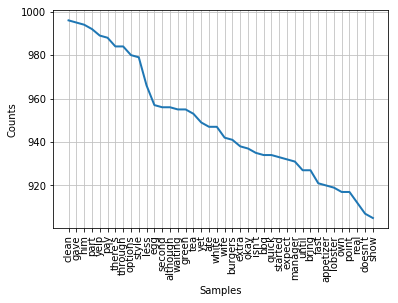

In [31]:
words = all_words.copy()
for w, count in all_words.items():
    if count > 1000 or count == 1:
        del words[w]

print('feature words:', len(words))
words.plot(40)

In [106]:
word_features = frozenset(words.keys())
i=0
words_numbered=dict()
for w in word_features:
    words_numbered[w]=i
    i+=1

In [142]:
def doc2vec(text):
    return [ (i,words_numbered[w]) for i,w in enumerate(toker.tokenize(text.lower())) if w in words_numbered ]

In [143]:
#cosine similarity
corpus = [ doc2vec(t) for t in random.sample(list(reviews[reviews['classification']=='useful']['text']), 10)]


In [144]:
from gensim.similarities.docsim import Similarity
from gensim.test.utils import get_tmpfile

In [145]:
index = Similarity(None, corpus, num_features=len(words_numbered))  # create index

/home/big_files/NPRG045/lib/python3.7/site-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [162]:
def features(row):
    text=row.text
    txt_words = set(toker.tokenize(text.lower()))
    features = {}
    for w in txt_words & word_features:
        #features['contains({})'.format(w)] = 'Yes' # beze slov je to lepsi
        pass
    
    text_tok=toker.tokenize(text.lower())
    for w,w2 in zip(text_tok[:-1], text_tok[1:]):
        if w in word_features and w2 in word_features:
                features['contains({}&&&{})'.format(w,w2)] = 'Yes'
                pass
            
    #features['contains(@@stars{})'.format(row.stars)] = 'Yes'
    features['@@@stars'] = row.stars
    features['@@@bus_stars']=row['business_id']['stars']
    #features['@@@review_count']= "A lot" if row['business']['review_count']  else "A few"
    l=row['words']
    features['@@@review_length']= "short" if l<50 else "middle" if l<150 else "long"
    features['@@@review_length50']= "short" if l<50 else "middle"
    features['@@@review_length100']= "short" if l<100 else "middle"
    features['@@@review_length150']= "short" if l<150 else "middle"
    features['@@@review_length35']= "short" if l<35 else "middle"
    features['@@@review_length75']= "short" if l<75 else "middle"
    
    rate=row['incorrect_words']/row['words']
    
    features['@@@error_rate0.02'] = "good" if rate<0.02 else "bad"
    features['@@@error_rate0.05'] = "good" if rate<0.05 else "bad"
    features['@@@error_rate0.1'] = "good" if rate<0.1 else "bad"
    features['@@@error_rate0.15'] = "good" if rate<0.15 else "bad"
    features['@@@error_rate0.2'] = "good" if rate<0.2 else "bad"
    
    # not 100% haha
    #features['aaa'] = 'a' if row.useful > 0 else 'b'
    cos_sims = index[doc2vec(text)]
    for i,x in enumerate(cos_sims):
        features['@@@cos_sim4_{}'.format(i)]=1 if x>0.4 else 0
        features['@@@cos_sim6_{}'.format(i)]=1 if x>0.6 else 0
        features['@@@cos_sim8_{}'.format(i)]=1 if x>0.8 else 0
        features['@@@cos_sim9_{}'.format(i)]=1 if x>0.9 else 0
        features['@@@cos_sim95_{}'.format(i)]=1 if x>0.95 else 0
    
    return features

In [163]:
# generate tuples: (features_dict, sentiment)
feature_sets = [(features(row), row.classification) for index, row in reviews.iterrows()]

In [164]:
feature_sets[0]

({'contains(until&&&noon)': 'Yes',
  'contains(sadly&&&mistaken)': 'Yes',
  'contains(1lb&&&pulled)': 'Yes',
  'contains(arrived&&&lukewarm)': 'Yes',
  'contains(nearly&&&tasteless)': 'Yes',
  "contains(opening&&&isn't)": 'Yes',
  "contains(isn't&&&paying)": 'Yes',
  '@@@stars': 1,
  '@@@bus_stars': 2.0,
  '@@@review_length': 'long',
  '@@@review_length50': 'middle',
  '@@@review_length100': 'middle',
  '@@@review_length150': 'middle',
  '@@@review_length35': 'middle',
  '@@@review_length75': 'middle',
  '@@@error_rate0.02': 'good',
  '@@@error_rate0.05': 'good',
  '@@@error_rate0.1': 'good',
  '@@@error_rate0.15': 'good',
  '@@@error_rate0.2': 'good',
  '@@@cos_sim4_0': 0,
  '@@@cos_sim6_0': 0,
  '@@@cos_sim8_0': 0,
  '@@@cos_sim9_0': 0,
  '@@@cos_sim95_0': 0,
  '@@@cos_sim4_1': 0,
  '@@@cos_sim6_1': 0,
  '@@@cos_sim8_1': 0,
  '@@@cos_sim9_1': 0,
  '@@@cos_sim95_1': 0,
  '@@@cos_sim4_2': 0,
  '@@@cos_sim6_2': 0,
  '@@@cos_sim8_2': 0,
  '@@@cos_sim9_2': 0,
  '@@@cos_sim95_2': 0,
  '@@@

# Model training

In [165]:
    import random
    random.shuffle(feature_sets)
    half=int(len(feature_sets)/2)
    train_set, test_set = feature_sets[:half], feature_sets[half:]
    half

10000

In [166]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.6901


In [167]:
classifier.show_most_informative_features(30)

Most Informative Features
    contains(de&&&gallo) = 'Yes'          useful : not-us =     13.8 : 1.0
     contains(pico&&&de) = 'Yes'          useful : not-us =     13.8 : 1.0
contains(fellow&&&yelpers) = 'Yes'          useful : not-us =     12.5 : 1.0
contains(vegetarian&&&options) = 'Yes'          useful : not-us =     10.3 : 1.0
contains(grand&&&opening) = 'Yes'          useful : not-us =      8.4 : 1.0
contains(amuse&&&bouche) = 'Yes'          useful : not-us =      7.7 : 1.0
contains(facebook&&&page) = 'Yes'          useful : not-us =      7.7 : 1.0
contains(halfway&&&through) = 'Yes'          useful : not-us =      7.7 : 1.0
contains(saving&&&grace) = 'Yes'          useful : not-us =      7.5 : 1.0
           @@@cos_sim6_9 = 1              not-us : useful =      7.3 : 1.0
    contains(yelp&&&app) = 'Yes'          useful : not-us =      7.1 : 1.0
contains(lightly&&&breaded) = 'Yes'          useful : not-us =      7.1 : 1.0
contains(recently&&&opened) = 'Yes'          useful : not-

# get feature matrix

In [168]:

X, Y = [x[0] for x in feature_sets], [x[1] for x in feature_sets]

In [169]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [170]:
X[0]

{'contains(dim&&&sum)': 'Yes',
 'contains(sesame&&&balls)': 'Yes',
 'contains(creme&&&bun)': 'Yes',
 'contains(bamboo&&&leaf)': 'Yes',
 'contains(sum&&&anytime)': 'Yes',
 '@@@stars': 4,
 '@@@bus_stars': 3.5,
 '@@@review_length': 'middle',
 '@@@review_length50': 'middle',
 '@@@review_length100': 'middle',
 '@@@review_length150': 'short',
 '@@@review_length35': 'middle',
 '@@@review_length75': 'middle',
 '@@@error_rate0.02': 'good',
 '@@@error_rate0.05': 'good',
 '@@@error_rate0.1': 'good',
 '@@@error_rate0.15': 'good',
 '@@@error_rate0.2': 'good',
 '@@@cos_sim4_0': 0,
 '@@@cos_sim6_0': 0,
 '@@@cos_sim8_0': 0,
 '@@@cos_sim9_0': 0,
 '@@@cos_sim95_0': 0,
 '@@@cos_sim4_1': 0,
 '@@@cos_sim6_1': 0,
 '@@@cos_sim8_1': 0,
 '@@@cos_sim9_1': 0,
 '@@@cos_sim95_1': 0,
 '@@@cos_sim4_2': 0,
 '@@@cos_sim6_2': 0,
 '@@@cos_sim8_2': 0,
 '@@@cos_sim9_2': 0,
 '@@@cos_sim95_2': 0,
 '@@@cos_sim4_3': 0,
 '@@@cos_sim6_3': 0,
 '@@@cos_sim8_3': 0,
 '@@@cos_sim9_3': 0,
 '@@@cos_sim95_3': 0,
 '@@@cos_sim4_4': 0,
 '

In [171]:
cv_gain = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000)

In [172]:
all_keys=[set(x.keys()) for x in X]

In [173]:
import functools
all_fs=functools.reduce(lambda a,b: a.union(b), all_keys)
all_fs=list(all_fs)

In [174]:
len(all_fs)

113648

In [175]:
def get_int(val):
    if isinstance(val, int):
        return val
    if isinstance(val, float):
        return val
    vals={"Yes":1, "No":0, "middle":1, "long":2, "short":0, "good":1, "bad":0}
    return vals[val]

In [176]:
#X_matrix=[]
#
#for x in X:
#    row=[]
#    for key in all_fs:
#        if key in x:
#            row.append(get_int(x[key]))
#        else:
#            row.append(0)
#    X_matrix.append(row)

In [177]:
import scipy

In [178]:
row=[]
x=X[0]

for key in all_fs:
    if key in x:
        row.append(get_int(x[key]))
    else:
        row.append(0)
        
X_matrix=scipy.sparse.lil_matrix([row])

i=0
for x in X[1:]:
    row=[]
    for key in all_fs:
        if key in x:
            row.append(get_int(x[key]))
        else:
            row.append(0)
    X_matrix=scipy.sparse.vstack((X_matrix, scipy.sparse.lil_matrix([row])))
    i+=1
    #if i==1000:
       #break

In [179]:
len(X)

20000

In [180]:
X_matrix

<20000x113648 sparse matrix of type '<class 'numpy.float64'>'
	with 380942 stored elements in COOrdinate format>

## Dimension reduction - LSA - SVD

In [181]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import scale

In [182]:
svd = TruncatedSVD(n_components = 100)
#scale(X_matrix.tocsc())
svdMatrix = svd.fit_transform(X_matrix)

In [183]:
feature_set_reduced = [ (dict(enumerate(x)),y) for (x,y) in zip(svdMatrix, Y)]

In [184]:
random.shuffle(feature_set_reduced)
half=int(len(feature_sets)/2)
train_set, test_set = feature_sets[:half], feature_sets[half:]
half

10000

# training

In [185]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.6901


# get feature matrix

In [186]:

X, Y = [x[0] for x in test_set], [x[1] for x in test_set]

In [187]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [188]:
X[0]

{'contains(american&&&comfort)': 'Yes',
 'contains(imaginative&&&salads)': 'Yes',
 'contains(250&&&selections)': 'Yes',
 'contains(heavy&&&100)': 'Yes',
 'contains(100&&&degree)': 'Yes',
 'contains(degree&&&heat)': 'Yes',
 'contains(worked&&&fine)': 'Yes',
 'contains(baby&&&lettuce)': 'Yes',
 'contains(fennel&&&blue)': 'Yes',
 'contains(citrus&&&balsamic)': 'Yes',
 'contains(balsamic&&&vinaigrette)': 'Yes',
 'contains(bone-in&&&ribeye)': 'Yes',
 'contains(popular&&&cut)': 'Yes',
 'contains(18&&&oz)': 'Yes',
 "contains(chef's&&&butter)": 'Yes',
 'contains(sins&&&behind)': 'Yes',
 'contains(behind&&&butter)': 'Yes',
 'contains(creek&&&farms)': 'Yes',
 'contains(farms&&&natural)': 'Yes',
 'contains(natural&&&black)': 'Yes',
 'contains(black&&&angus)': 'Yes',
 'contains(vegetarian&&&fed)': 'Yes',
 'contains(n&&&waffles)': 'Yes',
 'contains(slight&&&mix-up)': 'Yes',
 "contains(they're&&&washing)": 'Yes',
 'contains(alexander&&&valley)': 'Yes',
 'contains(solid&&&choice)': 'Yes',
 '@@@stars'

In [189]:
cv_gain = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000)

In [190]:
all_keys=[set(x.keys()) for x in X]

In [191]:
import functools
all_fs=functools.reduce(lambda a,b: a.union(b), all_keys)
all_fs=list(all_fs)

In [192]:
len(all_fs)

63212

In [193]:
def get_int(val):
    if isinstance(val, int):
        return val
    if isinstance(val, float):
        return val
    vals={"Yes":1, "No":0, "middle":1, "long":2, "short":0, "good":1, "bad":0}
    return vals[val]

In [194]:
#X_matrix=[]
#
#for x in X:
#    row=[]
#    for key in all_fs:
#        if key in x:
#            row.append(get_int(x[key]))
#        else:
#            row.append(0)
#    X_matrix.append(row)

In [195]:
import scipy

In [196]:
row=[]
x=X[0]

for key in all_fs:
    if key in x:
        row.append(get_int(x[key]))
    else:
        row.append(0)
        
X_matrix=scipy.sparse.lil_matrix([row])

i=0
for x in X[1:]:
    row=[]
    for key in all_fs:
        if key in x:
            row.append(get_int(x[key]))
        else:
            row.append(0)
    X_matrix=scipy.sparse.vstack((X_matrix, scipy.sparse.lil_matrix([row])))
    i+=1
    #if i==1000:
       #break

In [197]:
len(X)

10000

In [198]:
X_matrix

<10000x63212 sparse matrix of type '<class 'numpy.float64'>'
	with 191096 stored elements in COOrdinate format>

# information gaion

In [199]:
res_gain = list(zip(all_fs, mutual_info_classif(X_matrix, Y, discrete_features=True)))

In [200]:
#res_gain

In [201]:
[(x,y) for (x,y) in res_gain if y>0.0005]

[('contains(baked&&&potato)', 0.0006199877278830249),
 ('@@@cos_sim4_9', 0.0034275782093818284),
 ('contains(stir&&&fry)', 0.0006140375422115719),
 ('contains(dark&&&wood)', 0.0005572076583861886),
 ('contains(players&&&card)', 0.0005510041267192045),
 ('contains(months&&&ago)', 0.0006667444121236715),
 ('contains(7th&&&street)', 0.0006888543809776462),
 ('@@@review_length35', 0.0353567247913978),
 ('contains(yelp&&&deal)', 0.000619924288264702),
 ('contains(positive&&&note)', 0.0006888543809776462),
 ('contains(corn&&&tortillas)', 0.000501173585328935),
 ('contains(365&&&challenge)', 0.000619924288264702),
 ('contains(gordon&&&ramsay)', 0.000619924288264702),
 ('contains(bring&&&cash)', 0.000619924288264702),
 ("contains(friend's&&&birthday)", 0.0005438790313004719),
 ('contains(extra&&&crispy)', 0.0005438790313004719),
 ('@@@review_length75', 0.07334312233540027),
 ('contains(iced&&&tea)', 0.001035158920946723),
 ('contains(thinly&&&sliced)', 0.0007848973821103712),
 ('@@@error_rate0

In [202]:
[(x,y) for (x,y) in res_gain if y>0.001]

[('@@@cos_sim4_9', 0.0034275782093818284),
 ('@@@review_length35', 0.0353567247913978),
 ('@@@review_length75', 0.07334312233540027),
 ('contains(iced&&&tea)', 0.001035158920946723),
 ('@@@error_rate0.1', 0.002798921586535129),
 ('@@@review_length50', 0.05222510337226674),
 ('@@@stars', 0.015477931467260106),
 ('@@@review_length150', 0.07475263641279895),
 ('@@@bus_stars', 0.001927710835748127),
 ('@@@review_length', 0.09310700900951199),
 ('@@@error_rate0.05', 0.0028686314948416225),
 ('@@@review_length100', 0.07851208762784664)]

In [203]:
sorted([(x,y) for (x,y) in res_gain if x[:3]=="@@@"])

[('@@@bus_stars', 0.001927710835748127),
 ('@@@cos_sim4_0', 0.00011261140604302113),
 ('@@@cos_sim4_1', 6.88408191077118e-05),
 ('@@@cos_sim4_2', 6.88408191077118e-05),
 ('@@@cos_sim4_3', 9.097929397882017e-06),
 ('@@@cos_sim4_4', 8.881784197001252e-16),
 ('@@@cos_sim4_5', 8.881784197001252e-16),
 ('@@@cos_sim4_6', 0.0009799378024624404),
 ('@@@cos_sim4_7', 8.881784197001252e-16),
 ('@@@cos_sim4_8', 2.529338507001235e-05),
 ('@@@cos_sim4_9', 0.0034275782093818284),
 ('@@@cos_sim6_0', 6.88408191077118e-05),
 ('@@@cos_sim6_1', 6.88408191077118e-05),
 ('@@@cos_sim6_2', 8.881784197001252e-16),
 ('@@@cos_sim6_3', 6.88408191077118e-05),
 ('@@@cos_sim6_4', 8.881784197001252e-16),
 ('@@@cos_sim6_5', 8.881784197001252e-16),
 ('@@@cos_sim6_6', 6.88408191077118e-05),
 ('@@@cos_sim6_7', 8.881784197001252e-16),
 ('@@@cos_sim6_8', 8.881784197001252e-16),
 ('@@@cos_sim6_9', 0.0001883371947693285),
 ('@@@cos_sim8_0', 6.88408191077118e-05),
 ('@@@cos_sim8_1', 6.88408191077118e-05),
 ('@@@cos_sim8_2', 8